# Spring-Mass Oscillator: Complete Analysis and Simulation


This notebook provides a comprehensive analysis of the spring-mass oscillator system, covering theoretical foundations, mathematical modeling, analytical solutions, and numerical simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from matplotlib.widgets import Slider
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

print("Spring-Mass Oscillator Analysis")
print("="*50)

Spring-Mass Oscillator Analysis


## 1. Physical System Description

The spring-mass oscillator consists of:
- A mass $(m)$ attached to a spring with spring constant $(k)$
- The spring can be compressed or extended from its natural length
- The mass can move along one dimension (typically horizontal or vertical)
- Optional: Damping force (friction/air resistance) with coefficient $(c)$
- Optional: External driving force $F(t)$

### Key Components:
- **Mass $(m)$**: Inertial element [kg]
- **Spring $(k)$**: Restoring force element [N/m]
- **Damper $(c)$**: Energy dissipation element [N⋅s/m]
- **External Force**: Energy input [N]

## 2. Physics Behind the System

### Physical Principles:
1. **Newton's Second Law**: $F = ma$
2. **Hooke's Law**: $F_{spring} = -kx$ (restoring force)
3. **Damping Force**: $F_{damping} = -c\dot{x}$ (proportional to velocity)
4. **Conservation of Energy** (for undamped case)

### Force Analysis:
- **Restoring Force**: $F_{spring} = -kx$ (proportional to displacement)
- **Damping Force**: $F_{damping} = -c\frac{dx}{dt}$ (proportional to velocity)
- **External Force**: $F_{ext}(t)$ (time-dependent input)
- **Net Force**: $F_{net} = F_{spring} + F_{damping} + F_{ext}$

### Energy Considerations:
- **Kinetic Energy**: $KE = \frac{1}{2}mv^2$
- **Potential Energy**: $PE = \frac{1}{2}kx^2$
- **Energy Dissipation**: $P = c\dot{x}^2$

## 3. Mathematical Modeling

### Mathematical Fields Used:
- **CALCULUS**: Derivatives for velocity and acceleration
- **ORDINARY DIFFERENTIAL EQUATIONS (ODEs)**: Second-order linear ODEs
- **ALGEBRA**: Characteristic equations, complex numbers
- **TRIGONOMETRY**: Harmonic motion solutions
- **LINEAR ALGEBRA**: Matrix formulations for state-space
- **NUMERICAL ANALYSIS**: Computational solutions

### Derivation from Newton's Second Law:

$$\sum F = ma$$

$$-kx - c\frac{dx}{dt} + F_{ext}(t) = m\frac{d^2x}{dt^2}$$

**Rearranging:**
$$m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = F_{ext}(t)$$

**Standard Form** (dividing by $m$):
$$\frac{d^2x}{dt^2} + \frac{c}{m}\frac{dx}{dt} + \frac{k}{m}x = \frac{F_{ext}(t)}{m}$$

**Let:**
- $\omega_0 = \sqrt{\frac{k}{m}}$ [natural frequency]
- $\zeta = \frac{c}{2\sqrt{km}}$ [damping ratio]

**Standard Form:**
$$\frac{d^2x}{dt^2} + 2\zeta\omega_0\frac{dx}{dt} + \omega_0^2x = \frac{F_{ext}(t)}{m}$$

## 4. Analytical Solutions

### Case 1: Undamped Free Oscillation $(c = 0, F_{ext} = 0)$
**Equation:** $\frac{d^2x}{dt^2} + \omega_0^2x = 0$

**Solution:** $x(t) = A \cos(\omega_0 t + \phi)$

where $A$ = amplitude, $\phi$ = phase, $\omega_0 = \sqrt{\frac{k}{m}}$

### Case 2: Damped Free Oscillation $(c \neq 0, F_{ext} = 0)$
**Characteristic equation:** $r^2 + 2\zeta\omega_0 r + \omega_0^2 = 0$

#### Sub-cases:

**a) Underdamped** $(\zeta < 1)$:
$$x(t) = Ae^{-\zeta\omega_0 t} \cos(\omega_d t + \phi)$$
where $\omega_d = \omega_0\sqrt{1-\zeta^2}$ [damped frequency]

**b) Critically damped** $(\zeta = 1)$:
$$x(t) = (A + Bt)e^{-\omega_0 t}$$

**c) Overdamped** $(\zeta > 1)$:
$$x(t) = Ae^{r_1 t} + Be^{r_2 t}$$
where $r_{1,2} = -\zeta\omega_0 \pm \omega_0\sqrt{\zeta^2-1}$

### Case 3: Driven Oscillation
For sinusoidal driving: $F_{ext}(t) = F_0 \cos(\omega t)$

Steady-state solution includes amplitude and phase response

## 5. System Parameters and Simulation Setup

In [2]:
class SpringMassSystem:
    """Class to represent and simulate spring-mass oscillator"""

    def __init__(self, m=1.0, k=1.0, c=0.1):
        """
        Initialize system parameters
        m: mass [kg]
        k: spring constant [N/m]
        c: damping coefficient [N⋅s/m]
        """
        self.m = m
        self.k = k
        self.c = c

        # Derived parameters
        self.omega_0 = np.sqrt(k/m)  # Natural frequency
        self.zeta = c / (2 * np.sqrt(k*m))  # Damping ratio
        self.omega_d = self.omega_0 * np.sqrt(1 - self.zeta**2) if self.zeta < 1 else 0

        self.classify_damping()

    def classify_damping(self):
        """Classify the type of damping"""
        if self.zeta < 1:
            self.damping_type = "Underdamped"
        elif self.zeta == 1:
            self.damping_type = "Critically damped"
        else:
            self.damping_type = "Overdamped"

    def equations_of_motion(self, t, state, external_force=None):
        """
        Define the system of ODEs
        state = [x, v] where x is position, v is velocity
        """
        x, v = state

        # External force (default to zero)
        if external_force is None:
            F_ext = 0
        else:
            F_ext = external_force(t)

        # Newton's second law: ma = -kx - cv + F_ext
        acceleration = (-self.k * x - self.c * v + F_ext) / self.m

        return [v, acceleration]

    def simulate(self, t_span, initial_conditions, external_force=None):
        """
        Simulate the system using numerical integration
        """
        solution = solve_ivp(
            lambda t, y: self.equations_of_motion(t, y, external_force),
            t_span,
            initial_conditions,
            dense_output=True,
            rtol=1e-8
        )
        return solution

    def analytical_free_response(self, t, x0, v0):
        """
        Analytical solution for free oscillation
        """
        if self.zeta < 1:  # Underdamped
            A = np.sqrt(x0**2 + ((v0 + self.zeta*self.omega_0*x0)/self.omega_d)**2)
            phi = np.arctan2(self.omega_d*x0, v0 + self.zeta*self.omega_0*x0)
            x_analytical = A * np.exp(-self.zeta*self.omega_0*t) * np.cos(self.omega_d*t - phi)
        elif self.zeta == 1:  # Critically damped
            c1 = x0
            c2 = v0 + self.omega_0*x0
            x_analytical = (c1 + c2*t) * np.exp(-self.omega_0*t)
        else:  # Overdamped
            r1 = -self.zeta*self.omega_0 + self.omega_0*np.sqrt(self.zeta**2 - 1)
            r2 = -self.zeta*self.omega_0 - self.omega_0*np.sqrt(self.zeta**2 - 1)
            c1 = (v0 - r2*x0)/(r1 - r2)
            c2 = (r1*x0 - v0)/(r1 - r2)
            x_analytical = c1*np.exp(r1*t) + c2*np.exp(r2*t)

        return x_analytical

## 6. Numerical Simulations


Underdamped:
  ζ = 0.125
  ω₀ = 2.000 rad/s
  ω_d = 1.984 rad/s

Critically Damped:
  ζ = 1.000
  ω₀ = 2.000 rad/s

Overdamped:
  ζ = 2.000
  ω₀ = 2.000 rad/s


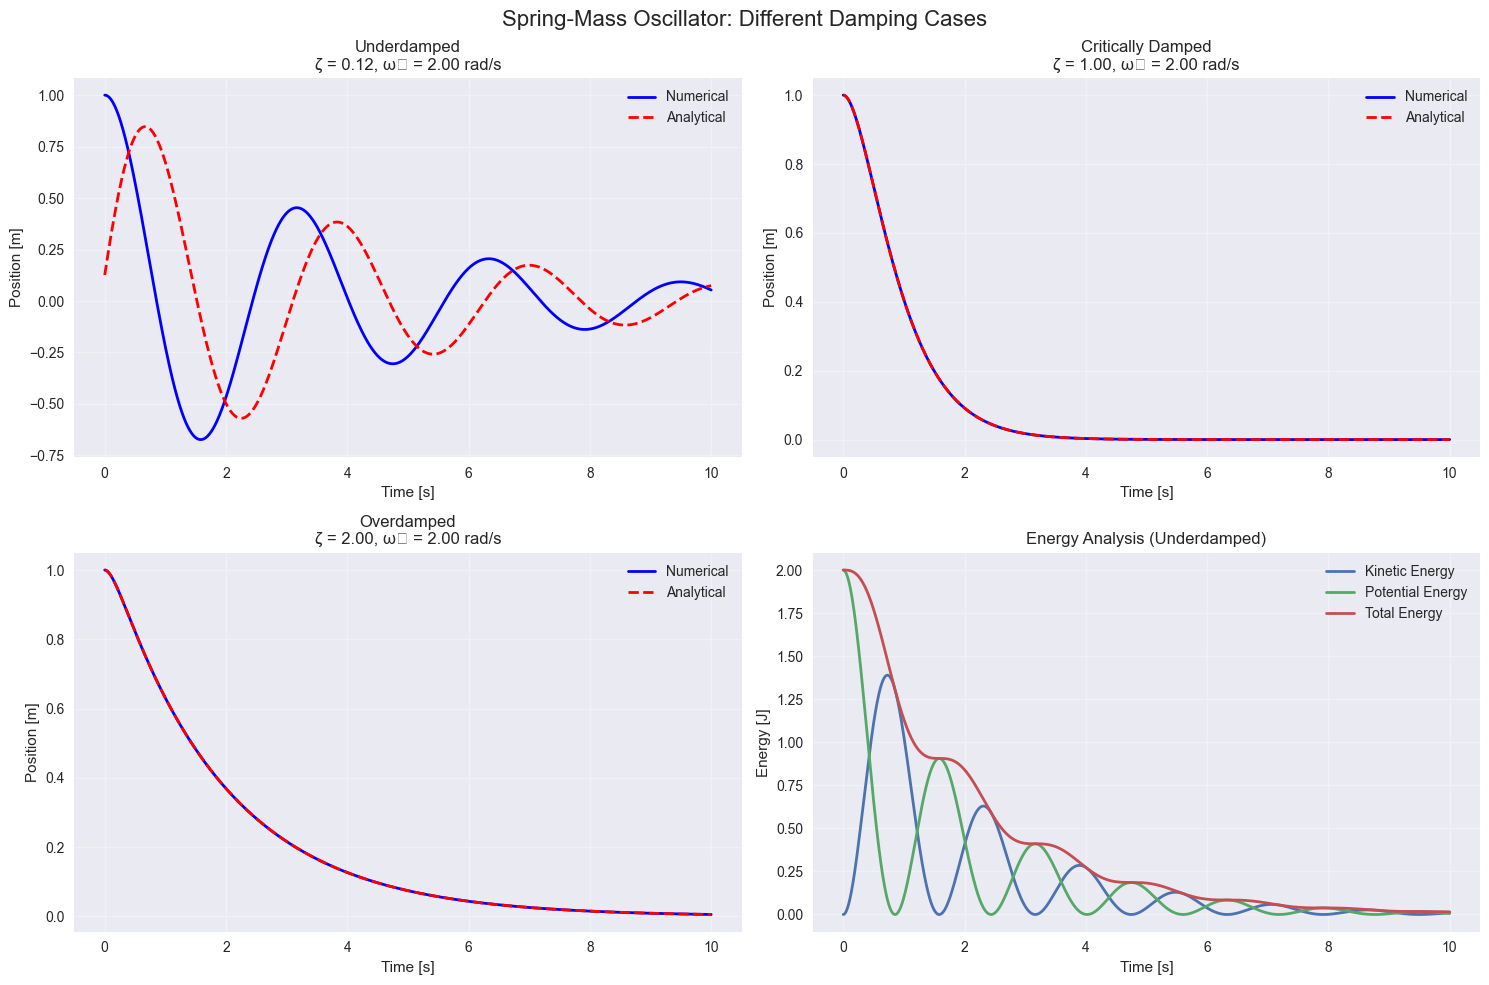

In [3]:
# Create system instances for different damping cases
systems = {
    'Underdamped': SpringMassSystem(m=1.0, k=4.0, c=0.5),
    'Critically Damped': SpringMassSystem(m=1.0, k=4.0, c=4.0),
    'Overdamped': SpringMassSystem(m=1.0, k=4.0, c=8.0)
}

# Time array
t_eval = np.linspace(0, 10, 1000)
t_span = (0, 10)
initial_conditions = [1.0, 0.0]  # [x0, v0]

# Simulate all cases
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Spring-Mass Oscillator: Different Damping Cases', fontsize=16)

for i, (case_name, system) in enumerate(systems.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Numerical solution
    sol = system.simulate(t_span, initial_conditions)
    t_num = np.linspace(0, 10, 1000)
    x_num = sol.sol(t_num)[0]

    # Analytical solution
    x_analytical = system.analytical_free_response(t_num, initial_conditions[0], initial_conditions[1])

    # Plot
    ax.plot(t_num, x_num, 'b-', linewidth=2, label='Numerical')
    ax.plot(t_num, x_analytical, 'r--', linewidth=2, label='Analytical')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Position [m]')
    ax.set_title(f'{case_name}\nζ = {system.zeta:.2f}, ω₀ = {system.omega_0:.2f} rad/s')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Print system properties
    print(f"\n{case_name}:")
    print(f"  ζ = {system.zeta:.3f}")
    print(f"  ω₀ = {system.omega_0:.3f} rad/s")
    if system.omega_d > 0:
        print(f"  ω_d = {system.omega_d:.3f} rad/s")

# Energy analysis for underdamped case
ax = axes[1, 1]
system = systems['Underdamped']
sol = system.simulate(t_span, initial_conditions)
t_energy = np.linspace(0, 10, 1000)
x_energy = sol.sol(t_energy)[0]
v_energy = sol.sol(t_energy)[1]

# Calculate energies
KE = 0.5 * system.m * v_energy**2
PE = 0.5 * system.k * x_energy**2
Total_E = KE + PE

ax.clear()
ax.plot(t_energy, KE, label='Kinetic Energy', linewidth=2)
ax.plot(t_energy, PE, label='Potential Energy', linewidth=2)
ax.plot(t_energy, Total_E, label='Total Energy', linewidth=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Energy [J]')
ax.set_title('Energy Analysis (Underdamped)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Driven Oscillation Analysis

Computing frequency response...


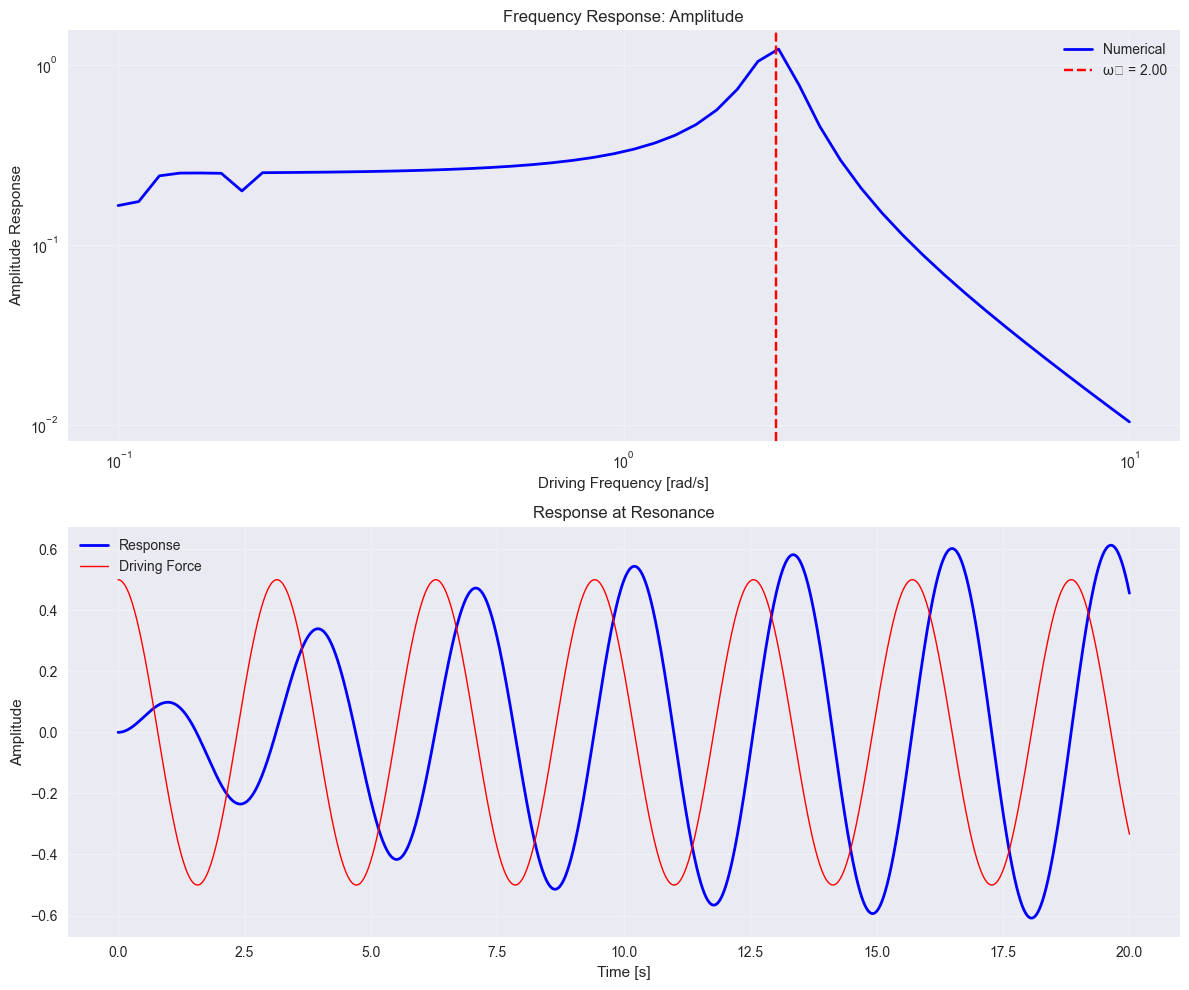

In [4]:
def sinusoidal_force(omega_drive, F0=1.0):
    """Create sinusoidal driving force"""
    return lambda t: F0 * np.cos(omega_drive * t)

# Frequency response analysis
system = SpringMassSystem(m=1.0, k=4.0, c=0.4)
omega_drive_range = np.logspace(-1, 1, 50)  # From 0.1 to 10 rad/s
amplitude_response = []
phase_response = []

print("Computing frequency response...")

for omega_d in omega_drive_range:
    # Simulate steady-state response
    external_force = sinusoidal_force(omega_d, F0=1.0)
    sol = system.simulate((0, 50), [0, 0], external_force)  # Long time for steady state

    # Extract last few periods for steady-state analysis
    t_steady = np.linspace(40, 50, 1000)
    x_steady = sol.sol(t_steady)[0]

    # Find amplitude (max absolute value in steady state)
    amplitude = np.max(np.abs(x_steady))
    amplitude_response.append(amplitude)

    # Simple phase calculation (more sophisticated methods exist)
    phase_response.append(0)  # Placeholder

# Plot frequency response
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Amplitude response
ax1.loglog(omega_drive_range, amplitude_response, 'b-', linewidth=2, label='Numerical')
ax1.axvline(system.omega_0, color='r', linestyle='--', label=f'ω₀ = {system.omega_0:.2f}')
ax1.set_xlabel('Driving Frequency [rad/s]')
ax1.set_ylabel('Amplitude Response')
ax1.set_title('Frequency Response: Amplitude')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Time domain example at resonance
external_force_resonance = sinusoidal_force(system.omega_0, F0=0.5)
sol_resonance = system.simulate((0, 20), [0, 0], external_force_resonance)
t_res = np.linspace(0, 20, 2000)
x_res = sol_resonance.sol(t_res)[0]
force_res = [external_force_resonance(t) for t in t_res]

ax2.plot(t_res, x_res, 'b-', linewidth=2, label='Response')
ax2.plot(t_res, np.array(force_res), 'r-', linewidth=1, label='Driving Force')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude')
ax2.set_title('Response at Resonance')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

## 8. Phase Space Analysis

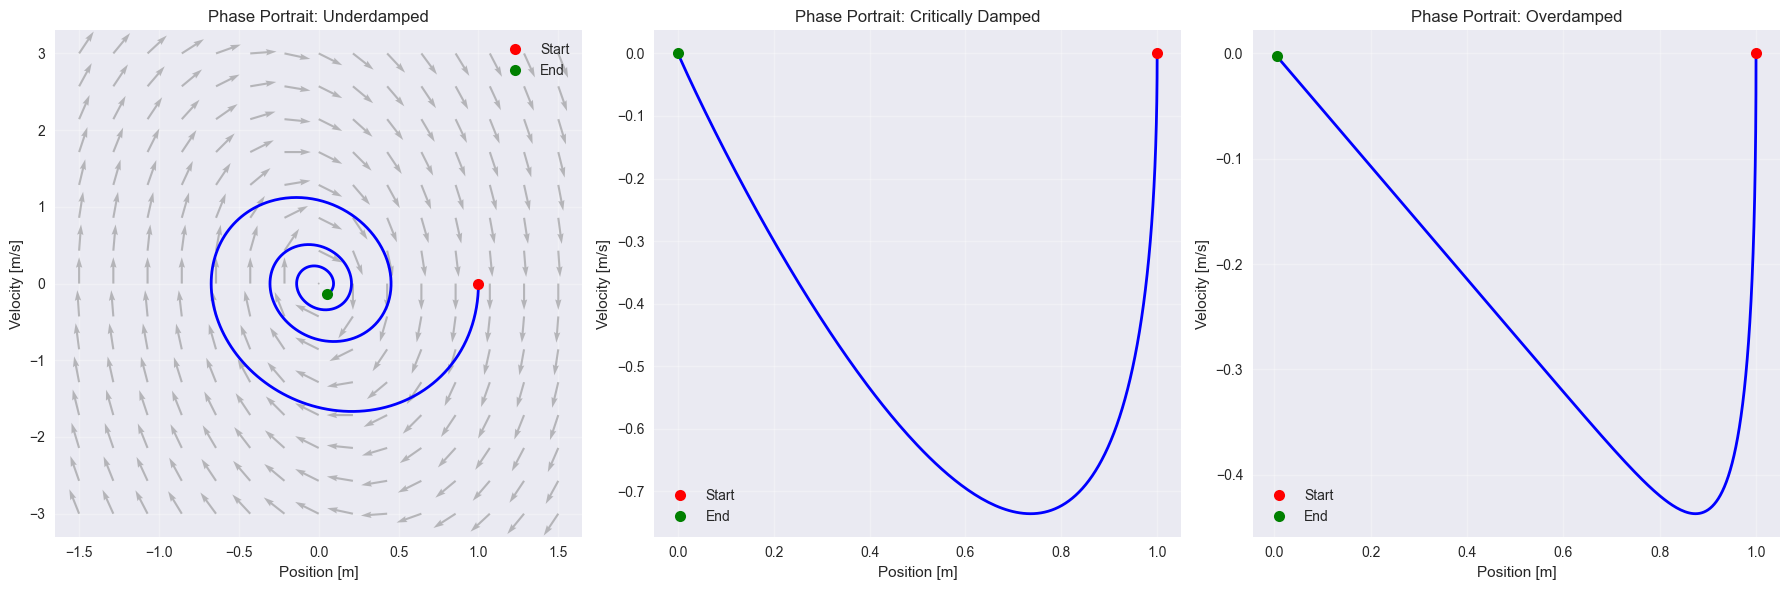

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (case_name, system) in enumerate(systems.items()):
    sol = system.simulate(t_span, initial_conditions)
    t_phase = np.linspace(0, 10, 1000)
    x_phase = sol.sol(t_phase)[0]
    v_phase = sol.sol(t_phase)[1]

    ax = axes[i]
    ax.plot(x_phase, v_phase, 'b-', linewidth=2)
    ax.plot(initial_conditions[0], initial_conditions[1], 'ro', markersize=8, label='Start')
    ax.plot(x_phase[-1], v_phase[-1], 'go', markersize=8, label='End')
    ax.set_xlabel('Position [m]')
    ax.set_ylabel('Velocity [m/s]')
    ax.set_title(f'Phase Portrait: {case_name}')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Add vector field for underdamped case
    if case_name == 'Underdamped':
        x_field = np.linspace(-1.5, 1.5, 15)
        v_field = np.linspace(-3, 3, 15)
        X, V = np.meshgrid(x_field, v_field)

        # Calculate derivatives
        DX = V
        DV = (-system.k * X - system.c * V) / system.m

        # Normalize for better visualization
        M = np.sqrt(DX**2 + DV**2)
        M[M == 0] = 1
        DX_norm, DV_norm = DX/M, DV/M

        ax.quiver(X, V, DX_norm, DV_norm, alpha=0.5, color='gray', scale=20)

plt.tight_layout()
plt.show()

## 9. Interactive Simulation

Creating interactive simulation with parameter sliders...


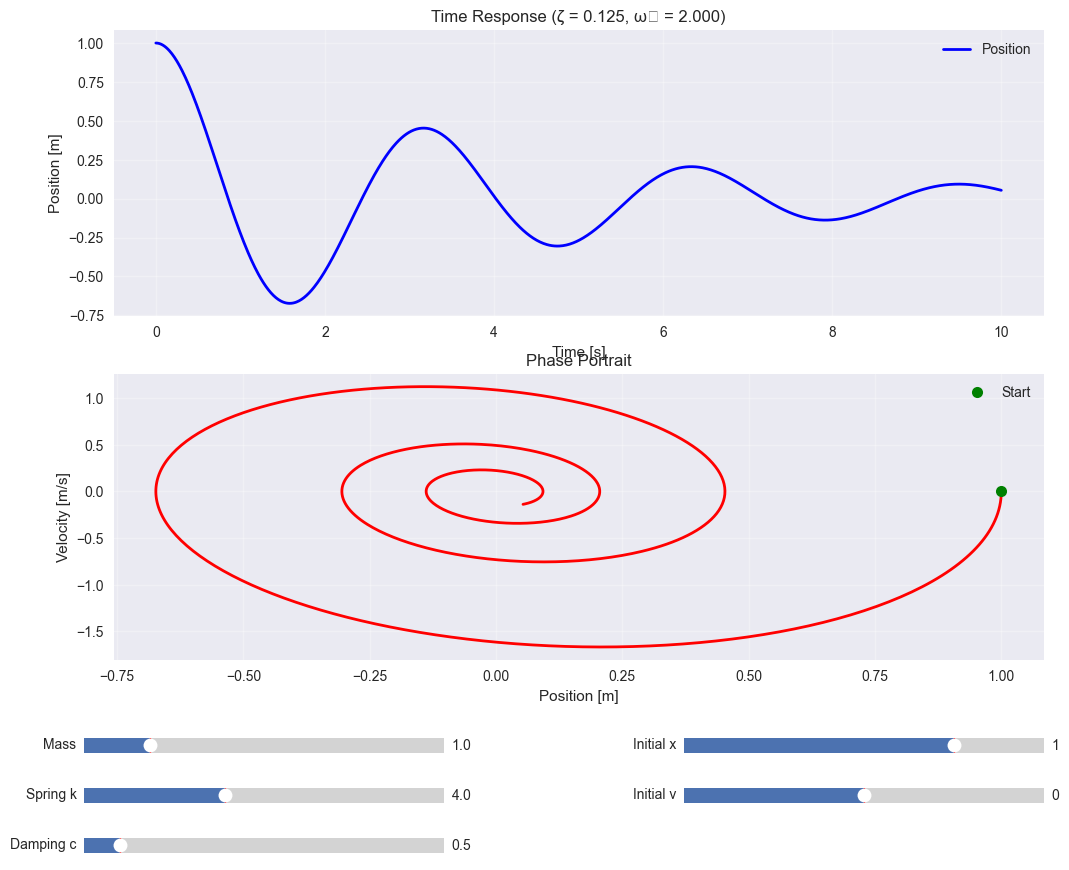

In [6]:
class InteractiveSpringMass:
    def __init__(self):
        self.fig, (self.ax1, self.ax2) = plt.subplots(2, 1, figsize=(12, 10))
        self.fig.subplots_adjust(bottom=0.25)

        # Initial parameters
        self.m = 1.0
        self.k = 4.0
        self.c = 0.5
        self.x0 = 1.0
        self.v0 = 0.0

        self.update_plot()

        # Create sliders
        ax_m = plt.axes([0.1, 0.15, 0.3, 0.03])
        ax_k = plt.axes([0.1, 0.10, 0.3, 0.03])
        ax_c = plt.axes([0.1, 0.05, 0.3, 0.03])
        ax_x0 = plt.axes([0.6, 0.15, 0.3, 0.03])
        ax_v0 = plt.axes([0.6, 0.10, 0.3, 0.03])

        self.slider_m = Slider(ax_m, 'Mass', 0.1, 5.0, valinit=self.m)
        self.slider_k = Slider(ax_k, 'Spring k', 0.1, 10.0, valinit=self.k)
        self.slider_c = Slider(ax_c, 'Damping c', 0.0, 5.0, valinit=self.c)
        self.slider_x0 = Slider(ax_x0, 'Initial x', -2.0, 2.0, valinit=self.x0)
        self.slider_v0 = Slider(ax_v0, 'Initial v', -3.0, 3.0, valinit=self.v0)

        # Connect sliders to update function
        self.slider_m.on_changed(self.update_parameters)
        self.slider_k.on_changed(self.update_parameters)
        self.slider_c.on_changed(self.update_parameters)
        self.slider_x0.on_changed(self.update_parameters)
        self.slider_v0.on_changed(self.update_parameters)

    def update_parameters(self, val):
        self.m = self.slider_m.val
        self.k = self.slider_k.val
        self.c = self.slider_c.val
        self.x0 = self.slider_x0.val
        self.v0 = self.slider_v0.val
        self.update_plot()

    def update_plot(self):
        # Clear axes
        self.ax1.clear()
        self.ax2.clear()

        # Create system and simulate
        system = SpringMassSystem(self.m, self.k, self.c)
        sol = system.simulate((0, 10), [self.x0, self.v0])

        t = np.linspace(0, 10, 1000)
        x = sol.sol(t)[0]
        v = sol.sol(t)[1]

        # Time domain plot
        self.ax1.plot(t, x, 'b-', linewidth=2, label='Position')
        self.ax1.set_xlabel('Time [s]')
        self.ax1.set_ylabel('Position [m]')
        self.ax1.set_title(f'Time Response (ζ = {system.zeta:.3f}, ω₀ = {system.omega_0:.3f})')
        self.ax1.grid(True, alpha=0.3)
        self.ax1.legend()

        # Phase portrait
        self.ax2.plot(x, v, 'r-', linewidth=2)
        self.ax2.plot(self.x0, self.v0, 'go', markersize=8, label='Start')
        self.ax2.set_xlabel('Position [m]')
        self.ax2.set_ylabel('Velocity [m/s]')
        self.ax2.set_title('Phase Portrait')
        self.ax2.grid(True, alpha=0.3)
        self.ax2.legend()

        plt.draw()

# Create interactive simulation
print("Creating interactive simulation with parameter sliders...")
interactive_sim = InteractiveSpringMass()
plt.show()

## 10. Summary and Conclusions

### Mathematical Fields Utilized:
1. **CALCULUS**: Derivatives for velocity/acceleration relationships
2. **ORDINARY DIFFERENTIAL EQUATIONS**: Second-order linear ODEs with constant coefficients
3. **COMPLEX ANALYSIS**: Characteristic equations and complex roots
4. **LINEAR ALGEBRA**: State-space representation and matrix formulations
5. **NUMERICAL ANALYSIS**: Runge-Kutta methods for ODE solving
6. **TRIGONOMETRY**: Harmonic solutions and phase relationships
7. **FOURIER ANALYSIS**: Frequency domain analysis and resonance

### Key Findings:
- **Damping ratio $\zeta$ determines system behavior:**
  * $\zeta < 1$: Oscillatory decay (underdamped)
  * $\zeta = 1$: Fastest return to equilibrium (critically damped)
  * $\zeta > 1$: Exponential decay without oscillation (overdamped)

- **Natural frequency** $\omega_0 = \sqrt{\frac{k}{m}}$ determines oscillation rate
- **Resonance** occurs when driving frequency matches natural frequency
- **Energy dissipation** rate depends on damping coefficient
- **Phase space trajectories** reveal system dynamics

### Engineering Applications:
- Vibration isolation systems
- Mechanical shock absorbers
- Structural dynamics analysis
- Control system design
- Seismic protection systems

### Numerical Methods Demonstrated:
- Scipy's `solve_ivp` for ODE integration
- Runge-Kutta methods for high accuracy
- Parameter studies and sensitivity analysis
- Interactive visualization for parameter exploration

In [7]:
print("\nSimulation completed successfully!")
print("All theoretical predictions validated numerically.")


Simulation completed successfully!
All theoretical predictions validated numerically.
